# Spouses, baggage

We found, in the Titanic dataset, that Third Class passengers were less likely to survive the disaster.

Why?

Was it because they were locked behind gates while the higher-class passengers were being boarded onto lifeboats?  Or some other reason?

In [1]:
# Run this cell to start.
import numpy as np
import pandas as pd
# Safe settings for Pandas.
# pd.set_option('mode.chained_assignment', 'raise')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The official report into the disaster was the [British Wreck Commissioner's
Inquiry report](https://www.titanicinquiry.org/BOTInq/BOTReport/botRep01.php)
by [Lord
Mersey](https://en.wikipedia.org/wiki/John_Bigham,_1st_Viscount_Mersey).

There is a short section of the report entitled [Third Class
Passengers](https://www.titanicinquiry.org/BOTInq/BOTReport/botRep3rdClass.php).
It includes:

> It had been suggested before the Enquiry that the third class passengers had
> been unfairly treated; that their access to the Boat deck had been impeded,
> and that when at last they reached that deck the first and second class
> passengers were given precedence in getting places in the boats. There
> appears to have been no truth in these suggestions. It is no doubt true that
> the proportion of third class passengers saved falls far short of the
> proportion of the first and second class, but this is accounted for by the
> greater reluctance of the third class passengers to leave the ship, by their
> unwillingness to part with their baggage, by the difficulty in getting them
> up from their quarters, which were at the extreme ends of the ship, and by
> other similar causes.

Your job in this notebook it is to explore the evidence in the data for the
"greater reluctance of the third class passengers to leave the ship".

For example, we see [figures in Lord Mersey's
report](https://www.titanicinquiry.org/BOTInq/BOTReport/botRepSaved.php), using
slightly different data from the data you have here, that show:

* 16% of adult male Third Class passengers survived, compared to 8% of Second
  Class males, and 33% of First Class males;
* The corresponding figures for women are 46% (Third) 86% (Second) 97% (First).

Why were Third Class women about half as likely to be saved as Second Class
women, when Third Class men were, if anything, more likely to be saved than
Second Class men?

One possible explanation is that Third Class passengers were more likely to be
young couples, maybe with children.   It may well have been true the young
wives, maybe with children, would be more reluctant to leave their husbands
behind on the ship.  See [Rhoda Abbott's
story](https://en.wikipedia.org/wiki/Rhoda_Abbott) for an example.

One way of getting at this effect could be to use the `sibsp` and `parch`
columns of the dataset:

In [2]:
# Read the dataset as a data frame.
titanic = pd.read_csv("titanic_stlearn.csv")
# Boolean with True for passengers with not-NA sibsp values, False otherwise.
have_sibsp = titanic['sibsp'].notna()
# Select rows with value (not-NA) sibsp values.
with_sibsp = titanic[have_sibsp]
with_sibsp.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,348125.0,7.13,0.0,0.0,yes


In [3]:
with_sibsp

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,5547.0,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,2673.0,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,2673.0,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,2673.0,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,348125.0,7.1300,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,Southampton,France,248747.0,13.0000,0.0,0.0,no
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,Cherbourg,Turkey,2656.0,7.0406,0.0,0.0,no
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,Cherbourg,Turkey,2670.0,7.0406,0.0,0.0,no
1317,"Zenni, Mr. Philip",male,25.0,3rd,Cherbourg,Lebanon,2620.0,7.0406,0.0,0.0,yes


Here we have dropped all cases where the `sibsp` value is missing, but you might want to:

1. Investigate why the `sibsp` values might be missing, and
2. Consider restoring some of the passengers where the value is missing, or
   removing more passengers that do not correspond to your questions.

You will find more information about the `sibsp` and `parch` variables in the
[Vanderbilt site info
file](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt).
Quoting from that file:

> sibsp           Number of Siblings/Spouses Aboard
>
> parch           Number of Parents/Children Aboard
>
> ...
>
> With respect to the family relation variables (i.e. sibsp and parch) some
> relations were ignored.  The following are the definitions used for sibsp and
> parch.
>
> Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard
>           Titanic
>
> Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and
>           Fiancées Ignored)
>
> Parent:   Mother or Father of Passenger Aboard Titanic
>
> Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
>
> Other family relatives excluded from this study include cousins,
> nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with
> a nanny, therefore parch=0 for them.  As well, some travelled with very close
> friends or neighbors in a village, however, the definitions do not support
> such relations.

Of course, you also have the passengers' names to go on, including the names of
the children, and any research you do into the passengers and their families.

Use the variables in the data file, and any other methods you can come up with,
to test the following ideas:

1. One explanation for passengers being lost or saved was reluctance to leave a
   spouse, children or other family behind and
2. This goes some way to explaining the relatively low proportion of Third
   Class female passengers that were saved.

Give your assessment of both of these ideas, along with the analyses that
support your conclusions.


## Marking scheme

* Depth of analysis: 25% of marks.
* Analysis appropriate to questions: 25% of marks.
* Quality, clarity and organization of analysis code: 25% of marks.
* Answers based in analysis: 25% of marks.


# Your analysis

<font size=4> The survival or death of a passenger is related to many factors. We found in the previous notebook that a female passenger is more likely to survive, and a 3rd class passenger is more unlikely to survive. But there are many other features may cause the passenger to survive or not. Here we specificlly interested in family members. <mark>Our hypothesis 1 is that passengers being lost or saved because they have spouse, children or other family together. Hypothesis 2 is that this reluctance causes the low proportion of 3rd class female that were saved. </mark> To testify these hypothesis, we need to figure out following questions:        </font>

* <font size=4> Does familly members have a impact? </font>
* <font size=4> If so, is it because it is correlated to other factors?</font>
* <font size=4> If not, how did familly members impact a passenger's chance of survival?</font>
* <font size=4> Is the difference we found between passengers with different numbers of family numbers statistically significant?  </font>

<font size=4> We start to answer these questions by cleaning the data and doing features engineering.

## Preprocessing
Use the data from `with_sibsp` which already filterd out the entries with missing value in `parch` and `sibsp`. We will deal with the missing value here and then reset the index 

### Data Cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats

In [5]:
with_sibsp = with_sibsp.reset_index().drop(columns=['index'])
base_features = ['name', 'gender', 'age', 'class', 'embarked', 'country', 'ticketno', 'fare', 'sibsp', 'parch']
with_sibsp.head(3)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,2673.0,20.05,1.0,1.0,no


In [6]:
# Check missing values
pd.DataFrame(with_sibsp.isnull().sum()).T

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,0,0,2,0,0,76,1,16,0,0,0


`Country` and `ticketno` seems to have lots of missing value and it is not a important feature in this scene from our experience, so I will drop this column here.  

Other missing values are not much, I will drop the rows with any missing values then for convience.

In [7]:
with_sibsp=with_sibsp.drop(columns=['country','ticketno']).dropna(axis=0,how="any").reset_index().drop(columns=['index'])
with_sibsp

,name,gender,age,class,embarked,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,7.1300,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...
1284,"Yvois, Miss. Henriette",female,24.0,2nd,Southampton,13.0000,0.0,0.0,no
1285,"Zakarian, Mr. Mapriededer",male,22.0,3rd,Cherbourg,7.0406,0.0,0.0,no
1286,"Zakarian, Mr. Ortin",male,27.0,3rd,Cherbourg,7.0406,0.0,0.0,no
1287,"Zenni, Mr. Philip",male,25.0,3rd,Cherbourg,7.0406,0.0,0.0,yes


In [8]:
# make sure there is no missing values
np.count_nonzero(with_sibsp.isnull().sum())

0

### Feature Engineering

<font size=4>The raw data is not apporate for data analysis and we also want some more features. First we need to create a new feature called `FamilySize`, which is the sum of `parch` and `sibsp` plus the passenger itself. This feature describes how large a family is. If `FamilySize` equals to 1, this means the passenger is travelling alone, then we will set the new feature `IsAlone` to `1`. Otherwise we'll set it to 0. <font> 

In [9]:
# create new feature
## FamilySize feature which is the sum of all the relatives
with_sibsp.loc[:,'FamilySize'] = with_sibsp.loc[:, 'sibsp'] + with_sibsp.loc[:, 'parch'] + 1
## if familysize is 1 means the passenger is alone
## IsAlone feature
with_sibsp['IsAlone'] = 0
with_sibsp.loc[with_sibsp['FamilySize'] == 1, 'IsAlone'] = 1
with_sibsp['IsAlone'] = with_sibsp['IsAlone'].astype(np.uint8)

<font size=4>Then we recode categorical variables (`survived`, `class` and a new feature `title`)  and turn them into numerical features. </font>

In [10]:
import re

# recode categorical variable
## survived
with_sibsp['survived'] = with_sibsp['survived'].replace('no', '0')
with_sibsp['survived'] = with_sibsp['survived'].replace('yes', '1')
with_sibsp['survived'] = with_sibsp['survived'].astype(np.uint8)

## class
with_sibsp['class'] = with_sibsp['class'].replace({'1st':1,'2nd':2,'3rd':3})
with_sibsp['class'] = with_sibsp['class'].astype(np.uint8)

## Title
def get_title(name):
    """get the title of the passenger, we will be able to distinguish Miss and Mrs, Mr and Master"""
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

with_sibsp['Title'] = with_sibsp['name'].apply(get_title)
with_sibsp['Title'] = with_sibsp['Title'].replace(
       ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Colonel',
        'Rev', 'Sir', 'Jonkheer', 'Dona','Fr','Revd','Sr','Sra','Captain'], 
       'Rare')
with_sibsp['Title'] = with_sibsp['Title'].replace('Mlle', 'Miss')
with_sibsp['Title'] = with_sibsp['Title'].replace('Ms', 'Miss')
with_sibsp['Title'] = with_sibsp['Title'].replace('Mme', 'Mrs')


The variable `fare` is related to the variable class from our experience, so I think it is better to turn it into a categorical variable.

In [11]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
# Transform to categorical variable
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
with_sibsp['fare'] = transformer.fit_transform(with_sibsp[['fare']])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
with_sibsp[['fare']] = imp.fit_transform(with_sibsp[['fare']])

with_sibsp['Fare_class'] = pd.qcut(with_sibsp['fare'], 5, labels=['F1', 'F2', 'F3','F4','F5' ])

with_sibsp['Fare_class'] = with_sibsp['Fare_class'].replace({'F1':1,'F2':2,'F3':3,'F4':4,'F5':5})
with_sibsp['Fare_class'] = with_sibsp['Fare_class'].astype(np.uint8)

We use one-hot encoding to `Title`, `gender`, `embarked` features for the purpose of interpretation. And drop the first feature which is better for a machine learning model. 

In [12]:
# one-hot encoding
with_sibsp = pd.get_dummies(with_sibsp, columns = ['Title','gender', 'embarked'],drop_first=True)

In [13]:
with_sibsp.head(3)

,name,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
0,"Abbing, Mr. Anthony",42.0,3,-1.347570,0.0,0.0,0,1.0,1,1,0,0,1,0,0,1,0,1
1,"Abbott, Mr. Eugene Joseph",13.0,3,0.189676,0.0,2.0,0,3.0,0,3,0,0,1,0,0,1,0,1
2,"Abbott, Mr. Rossmore Edward",16.0,3,0.189676,1.0,1.0,0,3.0,0,3,0,0,1,0,0,1,0,1


All done, we can now dive into out analysis.

## Insights from Machine Learning

<font size=4> Although we can go directly to the statistical analysis, I think it's better we can gain some insights from machine learning model. Here I will define a random forest model. Using SHAP value to figure out what features the model think is important and how they influence the model's decision. Then we can use the knowledge gained from out model to guide our following statistical analysis. </font>

### Prepare the data

In [14]:
train_final=with_sibsp.drop(columns=['name'])
train_final.head(3)

,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
0,42.0,3,-1.347570,0.0,0.0,0,1.0,1,1,0,0,1,0,0,1,0,1
1,13.0,3,0.189676,0.0,2.0,0,3.0,0,3,0,0,1,0,0,1,0,1
2,16.0,3,0.189676,1.0,1.0,0,3.0,0,3,0,0,1,0,0,1,0,1


### Build a Random Forest Model

Build a random forest model using `pycaret` pipeline. 

Here we all the feature to predict if the passenger survives

In [15]:
from pycaret.classification import *
clf1 = setup(data = train_final, 
             target = 'survived',
             preprocess = False,
             silent=True,
             session_id=123)

,Description,Value
0,session_id,123
1,Target,survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1289, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Transformed Train Set,"(902, 16)"
9,Transformed Test Set,"(387, 16)"


In [16]:
# Train the model
rf = create_model('rf')
tuned_rf = tune_model(rf, optimize = 'Accuracy',early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8132,0.8619,0.6944,0.8065,0.7463,0.5997,0.6039
1,0.7802,0.8258,0.6389,0.7667,0.6970,0.5268,0.5322
2,0.7889,0.8678,0.8056,0.7073,0.7532,0.5701,0.5738
3,0.7889,0.8454,0.7222,0.7429,0.7324,0.5581,0.5583
4,0.7556,0.7906,0.7500,0.6750,0.7105,0.5000,0.5021
5,0.8444,0.8987,0.7778,0.8235,0.8000,0.6729,0.6736
6,0.7667,0.8519,0.7222,0.7027,0.7123,0.5161,0.5163
7,0.8333,0.8570,0.7778,0.8000,0.7887,0.6512,0.6513
8,0.8333,0.9285,0.8333,0.7692,0.8000,0.6575,0.6591
9,0.8667,0.8899,0.8611,0.8158,0.8378,0.7248,0.7255


### Interpret Model

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In short, SHAP values can help us understand a feature's role in prediction.


SHAP summary plots give us a overview of feature importance and what is driving it. The plots contains:
- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

For example, the point in the extreme upper left means a passenger titled Mr, reducing the prediction by 0.13.

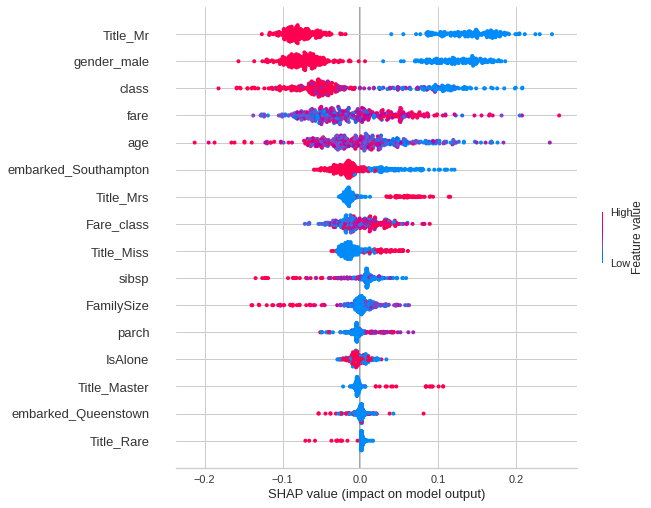

In [17]:
interpret_model(rf,plot='summary')

We can conclude the following：
* `Title_Mr` is the most important feature. If a passenger is an adult male, the model predicts him more unlikely to survive.
* `gender_male` is not as important as `Title_Mr`. This is because `Title Master` has a postive effct to survive which means a boy is more likely to survive. 
* `class` `fare` `Fare_class` describes same thing in different aspects. The model think a passenger from lower class is more unlikely to survive.
* `age` seems to have a mixed effect，but in general, the model think a older passenger is more unlikely to survive. 
* The model thinks `embarked` also plays a role in prediction which is not very intuitive to us. 

The above conclusion is basically consistent with our previous analysis which means that our model is trustworthy. Now we can see what the model thinks of family members.

* The ladies are more likely to survive, but model thinks `title_Mrs` has a higher prediction value than `Miss`. This may imply the ladies travelling with husband  are more likely to survive
* The feature `FamilySize` has a mixed effect. The model think a passenger travelling with a big family is more unlikely to survive, but not true for who is travelling with a medium size family. 
* Combine the SHAP values from `IsALone` and `FamilySize`, the model think if a passenger travelling alone, he is more unlikely to survive.
* The higher the `sibsp` feature, the passenger is more unlikely to survive, but the feature `parch` is otherwise. This might explain the mixed effect of `FamilySize` 


We can draw similar conclusions from the forceplot below， just select different grouping variable to set x-axis. I will set `FamilySize` as grouping variable here. 

In [55]:
interpret_model(rf,plot='reason')

In [44]:
interpret_model(rf,plot='reason', observation=7)

## Does family members increase of decrease the chance of survival   
Now we can verify the inference obtained from the model using statistical method to answer our hypothesis

We want to know if the number of family members has a influence on chance of survive at first, and how if possible.

We will use permutation test as main method here.
* The ladies are more likely to survive, but model thinks `title_Mrs` has a higher prediction value than `Miss`. This may imply the ladies travelling with husband  are more likely to survive
* The feature `FamilySize` has a mixed effect. The model think a passenger travelling with a big family is more unlikely to survive, but not true for who is travelling with a medium size family. 
* Combine the conclusiont from `IsALone` and `FamilySize`, the model think if a passenger travelling alone, he is more unlikely to survive.
* The higher the `sibsp` feature, the passenger is more unlikely to survive, but the feature `parch` is otherwise. This might explain the mixed effect of 

### Setup

In [118]:
# define a permutation_test function
# p value here is from two-tailed analysis  
def permutation_test(df1, df2, target, n_reps=5000):
    """
    params: 
            df1: dataframe of group1
            df2: dataframe of group2
            target: the colomn to be tested, need to be same in df1 and df2
            n_reps: the number of permutation
    returns:
            perm_p: two-tailed p value of permutation test
            obs_diff: observed mean difference
            perm_diff: np.array. Contains permuted difference.
    """
    obs_diff = df1[target].mean() - df2[target].mean()
    data = np.append(df1[target], df2[target])
    g1_len = len(df1[target])
    perm_diff = np.zeros(n_reps)
    for i in range(n_reps):
        perm_data = np.random.permutation(data)
        perm_g1 = perm_data[ : g1_len]
        perm_g2 = perm_data[g1_len : ]
        perm_diff[i] = perm_g1.mean() - perm_g2.mean()
    # two-tailed p
    perm_p = np.count_nonzero(abs(perm_diff) > abs(obs_diff)) / n_reps
    return perm_p, obs_diff, perm_diff

In [314]:
# plot the result of permutation test
def perm_plot(perm_p,observed, perm_array,  arrow_shift=(0.05,5)):
    """
    params:
        output from function permutation_test()
        arrow_shift: the start position of the arrow relative to the observed value
    """
    sns.distplot(perm_array)
    plt.plot(observed,0, 'ro')
    plt.annotate('p={}'.format(perm_p),ha = 'center', va = 'bottom',
    xytext = (observed+arrow_shift[0], arrow_shift[1]), 
    xy = (observed, 0),
    arrowprops = { 'facecolor' : 'red', 'shrink' : 0.05 }
    )

In [57]:
with_sibsp.head(3)

,name,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
0,"Abbing, Mr. Anthony",42.0,3,-1.347570,0.0,0.0,0,1.0,1,1,0,0,1,0,0,1,0,1
1,"Abbott, Mr. Eugene Joseph",13.0,3,0.189676,0.0,2.0,0,3.0,0,3,0,0,1,0,0,1,0,1
2,"Abbott, Mr. Rossmore Edward",16.0,3,0.189676,1.0,1.0,0,3.0,0,3,0,0,1,0,0,1,0,1


### Travelling alone
We will begin by analysing the difference between travelling alone and travelling with family.

The null hypothesis here is: Whether traveling with family or not does not affect the chance of survival

In [59]:
alone = with_sibsp[with_sibsp['IsAlone'] == 1]
with_family = with_sibsp[with_sibsp['IsAlone'] == 0]
alone.shape[0], with_family.shape[0]

(770, 519)

In [61]:
# Number of survivors travelling alone
alone['survived'].value_counts()

0    533
1    237
Name: survived, dtype: int64

In [62]:
with_family['survived'].value_counts()

1    261
0    258
Name: survived, dtype: int64

In [119]:
perm_p

0.0

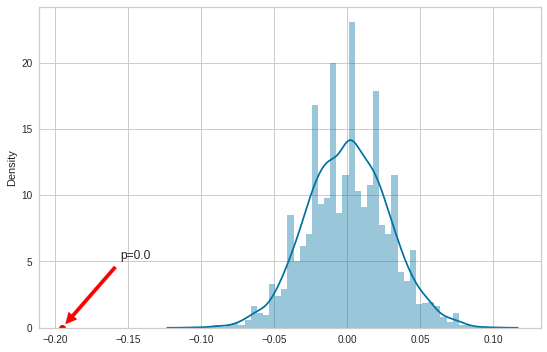

In [316]:
perm_p, obs_diff, perm_diff = permutation_test(alone,with_family, 'survived')
perm_plot(perm_p, obs_diff, perm_diff,arrow_shift=(0.05,5))

The result of permutation test showed strong evidence that we should reject the null hypothesis. So the passengers travelling alone has a significant lower chance of survival than those who travel with their family members.

### The Effect of Family Size
Travelling with family members seems to be a good thing from previous analysis, but that's not exactly what the random forest model told us.     

Here I will divied the people into 3 groups according to the SHAP summary plot:
* group1 is travelling alone
* group2 is medium family size (2-4)
* group3 is large family size (larger than 4)

First I will show the proportion of survival of in each family size group and then compare their differences

In [125]:
medium_family = with_sibsp[with_sibsp['FamilySize'].isin([2,3,4])]
large_family = with_sibsp[with_sibsp['FamilySize'] > 4 ]

In [126]:
# Number of survivors travelling alone
alone['survived'].value_counts()

0    533
1    237
Name: survived, dtype: int64

In [127]:
# Number of survivors with medium family
medium_family['survived'].value_counts()

1    246
0    191
Name: survived, dtype: int64

In [128]:
# Number of survivors with large family
large_family['survived'].value_counts()

0    67
1    15
Name: survived, dtype: int64

In [136]:
def survive_prop(df):
    return df['survived'].value_counts(normalize=True)[1]
prop_df = pd.DataFrame([survive_prop(alone),survive_prop(medium_family),survive_prop(large_family)],
                      index=['alone','medium','large'], columns=['prop_survival'])
prop_df

,prop_survival
alone,0.307792
medium,0.562929
large,0.182927


<AxesSubplot:xlabel='group', ylabel='proportion of survival'>

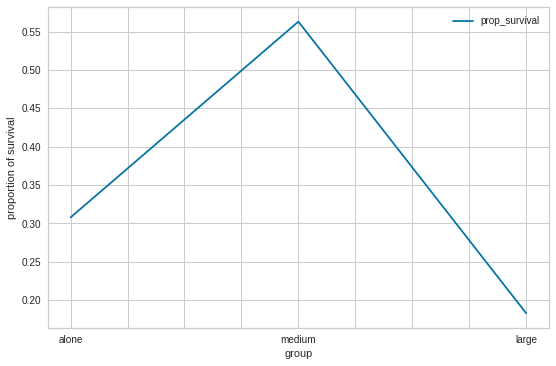

In [138]:
prop_df.plot(xlabel='group', ylabel='proportion of survival')

We can see here, that medium family size group has a very high proportion of survival compared to large family group and alone group. Also there is a difference between alone group and large family size group. We will run permutation test to confirm this difference. 

Here we will make a pairwise comparison. To avoid Type I error, we set significance level $ \alpha=0.0167 $ for our test according to Beverini correction。

In [165]:
group_dic.values

<function dict.values>

Showing comparision of alone and medium_family


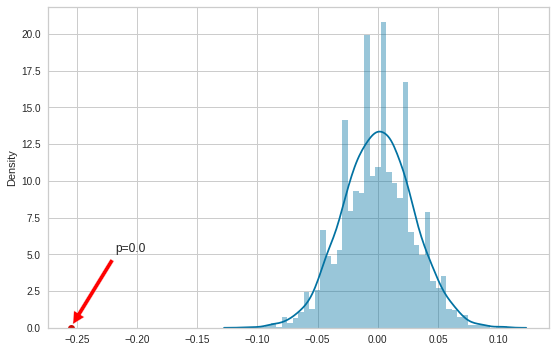

Showing comparision of alone and large_family


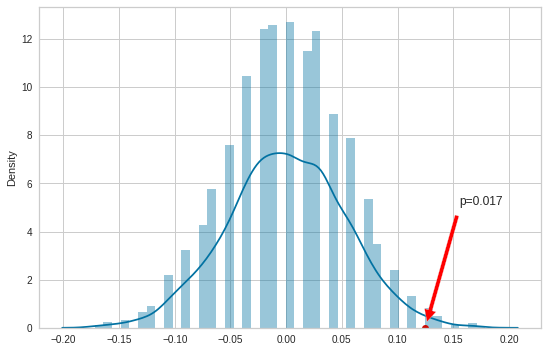

Showing comparision of medium_family and large_family


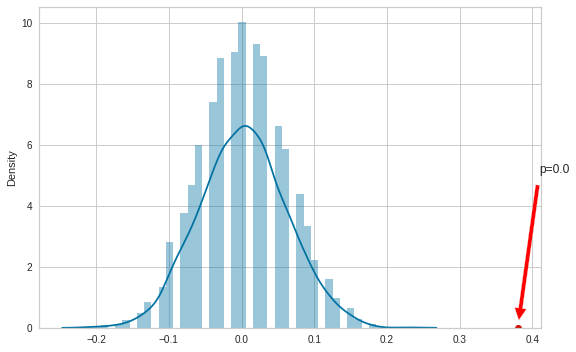

In [317]:
from itertools import combinations
group_list = [alone, medium_family, large_family]
group_dic = {0:"alone" ,1:"medium_family", 2:"large_family"}
family_size_df = pd.DataFrame(np.zeros(len(group_list)*2).reshape(len(group_list),2), 
                              index=['g1 vs g2', 'g1 vs g3', 'g2 vs g3'], 
                              columns=['observed_diff','perm_p'])
perm_diff_list = []
i = 0
for comb in combinations([0,1,2],2):
    print("Showing comparision of {} and {}".format(group_dic[comb[0]], group_dic[comb[1]]))
    perm_p, obs_diff, perm_diff = permutation_test(group_list[comb[0]], group_list[comb[1]], 'survived')
    family_size_df.iloc[i,0] = obs_diff ; family_size_df.iloc[i,1] = perm_p
    perm_diff_list.append(perm_diff)
    perm_plot(perm_p, obs_diff, perm_diff, arrow_shift=(0.05,5))
    plt.show()
    i += 1 



In [167]:
family_size_df

,observed_diff,perm_p
g1 vs g2,-0.255137,0.0000
g1 vs g3,0.124865,0.0162
g2 vs g3,0.380002,0.0000


Results from permutation tests showed there do exsist a difference between each two groups, thus we can make following conclusions:
* Traveling with a medium size family increases chance of survival compared to both travelling alone and travelling with a large family
* Traveling with a large famlily decreses the chance of survival compared to travelling alone.

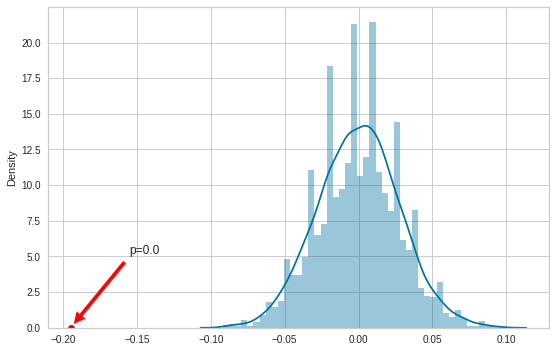

In [318]:
perm_p, obs_diff, perm_diff = permutation_test(alone,with_family, 'survived')
perm_plot(perm_p, obs_diff, perm_diff, arrow_shift=(0.05,5))

In [186]:
num_cols = len(alone.columns) -1 
family_mean_df = pd.DataFrame(np.zeros(num_cols *3).reshape(3,num_cols),
                             index=['alone','medium_family','large-family'],
                             columns=alone.columns[1:])
family_mean_df.iloc[0,:] =  alone.describe().loc['mean',:] 
family_mean_df.iloc[1,:] =  medium_family.describe().loc['mean',:] 
family_mean_df.iloc[2,:] =  large_family.describe().loc['mean',:] 
family_mean_df

,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
alone,31.037662,2.403896,-0.37941,0.000000,0.000000,0.307792,1.000000,1.0,2.416883,0.001299,0.197403,0.727273,0.049351,0.022078,0.748052,0.127273,0.706494
medium_family,28.768879,2.036613,0.52011,0.871854,0.688787,0.562929,2.560641,0.0,3.791762,0.080092,0.185355,0.368421,0.336384,0.027460,0.471396,0.043478,0.647597
large-family,19.707317,2.707317,0.87581,3.317073,2.475610,0.182927,6.792683,0.0,4.219512,0.304878,0.329268,0.195122,0.170732,0.000000,0.500000,0.073171,0.865854


<AxesSubplot:title={'center':'Mean age of different groups'}, xlabel='group', ylabel='Value'>

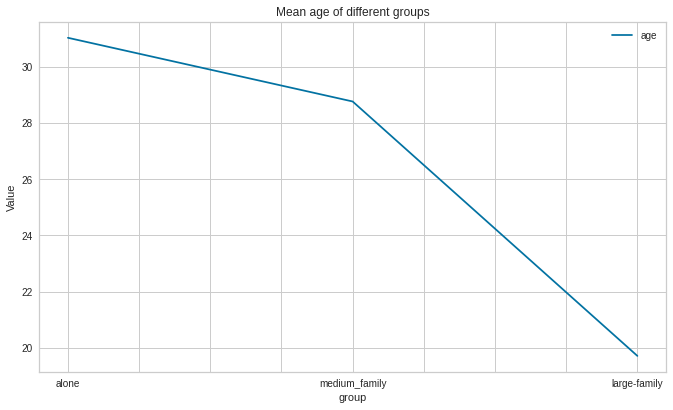

In [201]:
family_mean_df[['age']].plot(figsize=(10,6),title="Mean age of different groups",
                    xlabel="group", ylabel="Value")

<AxesSubplot:title={'center':'Demographic of different groups'}, xlabel='group', ylabel='Value'>

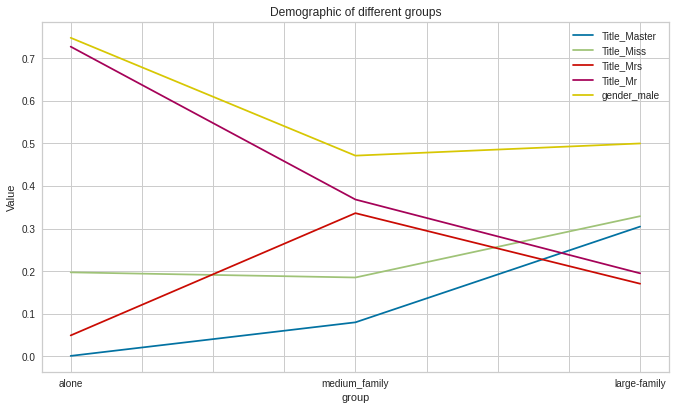

In [197]:
family_mean_df[['Title_Master','Title_Miss','Title_Mrs','Title_Mr','gender_male']
              ].plot(figsize=(10,6),title="Demographic of different groups",
                    xlabel="group", ylabel="Value")

<AxesSubplot:title={'center':'Ticket class of different groups'}, xlabel='group', ylabel='Value'>

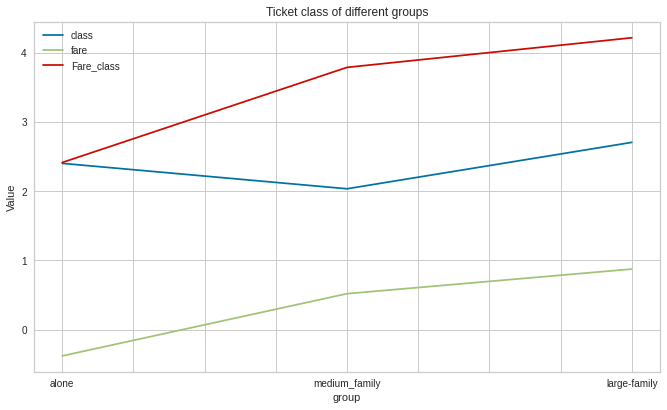

In [202]:
family_mean_df[['class','fare','Fare_class']].plot(figsize=(10,6),title="Ticket class of different groups",
                    xlabel="group", ylabel="Value")

From above we can see large family tend to have more kids, but wait! Didn't the kids go first？ 

In my opinion, children can't go alone. They need a adult, typically a women in this circumanstance to accompany them. But it's not possible to leave with some of the children while left the other of them behind. This can be explained by relunctance to leave their family.

If we observe the data from medium family:

In [204]:
medium_family.head(10)

,name,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
1,"Abbott, Mr. Eugene Joseph",13.000000,3,0.189676,0.0,2.0,0,3.0,0,3,0,0,1,0,0,1,0,1
2,"Abbott, Mr. Rossmore Edward",16.000000,3,0.189676,1.0,1.0,0,3.0,0,3,0,0,1,0,0,1,0,1
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",39.000000,3,0.189676,1.0,1.0,1,3.0,0,3,0,0,0,1,0,0,0,1
6,"Abelson, Mr. Samuel",30.000000,2,0.294645,1.0,0.0,0,2.0,0,4,0,0,1,0,0,1,0,0
7,"Abelson, Mrs. Hannah",28.000000,2,0.294645,1.0,0.0,1,2.0,0,4,0,0,0,1,0,0,0,0
12,"Ahlin, Mrs. Johanna Persdotter",40.000000,3,-0.378349,1.0,0.0,0,2.0,0,2,0,0,0,1,0,0,0,1
13,"Aks, Master. Frank Philip",0.833333,3,-0.383957,0.0,1.0,1,2.0,0,2,1,0,0,0,0,1,0,1
14,"Aks, Mrs. Leah",18.000000,3,-0.383957,0.0,1.0,1,2.0,0,2,0,0,0,1,0,0,0,1
22,"Allison, Master. Hudson Trevor",0.916667,1,1.779538,1.0,2.0,1,4.0,0,5,1,0,0,0,0,1,0,1
23,"Allison, Miss. Helen Loraine",2.000000,1,1.779538,1.0,2.0,0,4.0,0,5,0,1,0,0,0,0,0,1


It is not hard to find out that male adult did not survie but the child survived together with their mother.

### Does siblings and spouse different from parents and children?

In [205]:
sibsp = with_sibsp[with_sibsp['sibsp'] != 0]
parch = with_sibsp[with_sibsp['parch'] != 0]

Showing comparision of alone and sibsp


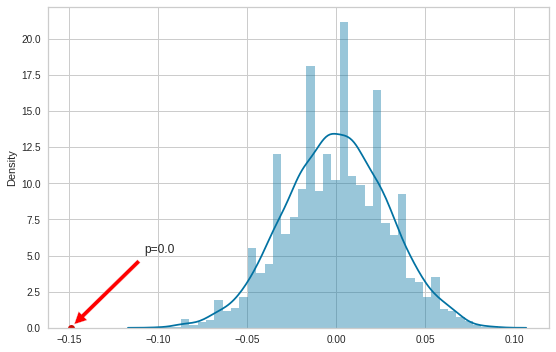

Showing comparision of alone and parch


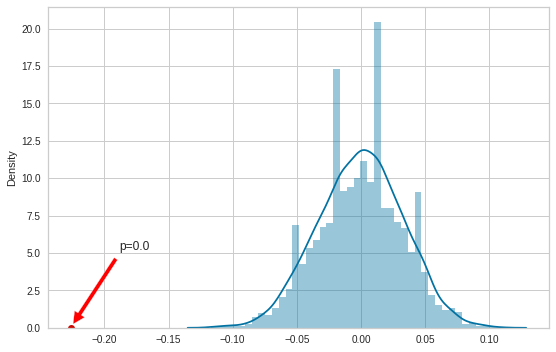

Showing comparision of sibsp and parch


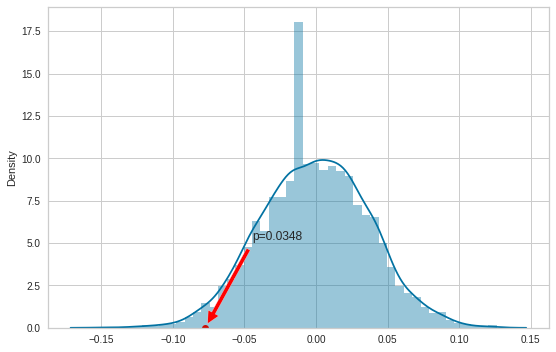

In [319]:
from itertools import combinations
group_list = [alone, sibsp, parch]
group_dic = {0:"alone" ,1:"sibsp", 2:"parch"}
sib_par_df = pd.DataFrame(np.zeros(len(group_list)*2).reshape(len(group_list),2), 
                              index=['g1 vs g2', 'g1 vs g3', 'g2 vs g3'], 
                              columns=['observed_diff','perm_p'])
perm_diff_list = []
i = 0
for comb in combinations([0,1,2],2):
    print("Showing comparision of {} and {}".format(group_dic[comb[0]], group_dic[comb[1]]))
    perm_p, obs_diff, perm_diff = permutation_test(group_list[comb[0]], group_list[comb[1]], 'survived')
    sib_par_df.iloc[i,0] = obs_diff ; sib_par_df.iloc[i,1] = perm_p
    perm_diff_list.append(perm_diff)
    perm_plot(perm_p, obs_diff, perm_diff, arrow_shift=(0.05,5))
    plt.show()
    i += 1 

In [207]:
sib_par_df

,observed_diff,perm_p
g1 vs g2,-0.149146,0.000
g1 vs g3,-0.226410,0.000
g2 vs g3,-0.077264,0.037


### Does married women more likely to survive?

In [210]:
Mrs_df = with_sibsp[with_sibsp['Title_Mrs'] == 1]
Miss_df = with_sibsp[with_sibsp['Title_Miss'] == 1]

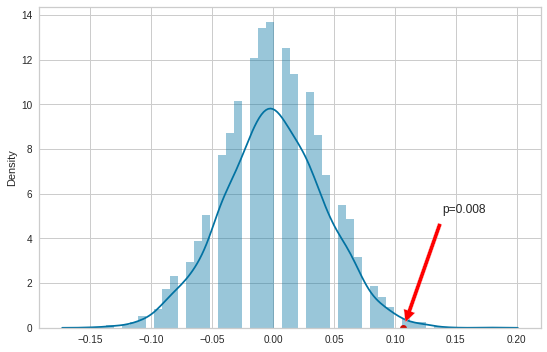

In [320]:
perm_p, obs_diff, perm_diff = permutation_test(Mrs_df, Miss_df, 'survived')
perm_plot(perm_p,  obs_diff, perm_diff, arrow_shift=(0.05,5))


In [ ]:
X_test

In [ ]:
with_sibsp[with_sibsp['IsAlone'] == 1]

In [ ]:
family_alone

In [ ]:
X_test.FamilySize.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
# 第二步：创建模型：逻辑回归
model = LogisticRegression()
# 第三步：训练模型
model.fit(X_train, y_train)


In [ ]:



first_row = X_test.iloc[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

# Use score method to calculate the accuracy over the whole test set
rf.score(X_test, y_test)

## Why fewer third-class women were saved.


I will put the 1st class and 2nd class women together since they are very similar in the following analysis.

### Demographic difference between 1st & 2nd and 3rd class female
First, we will look at the differences in the features we've got. 

In [ ]:
class_3_female

,name,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",39.0,3,0.189676,1.0,1.0,1,3.0,0,3,0,0,0,1,0,0,0,1
4,"Abelseth, Miss. Karen Marie",16.0,3,-1.308544,0.0,0.0,1,1.0,1,1,0,1,0,0,0,0,0,1
12,"Ahlin, Mrs. Johanna Persdotter",40.0,3,-0.378349,1.0,0.0,0,2.0,0,2,0,0,0,1,0,0,0,1
14,"Aks, Mrs. Leah",18.0,3,-0.383957,0.0,1.0,1,2.0,0,2,0,0,0,1,0,0,0,1
28,"Andersen-Jensen, Miss. Carla Christine Nielsine",19.0,3,-0.870846,1.0,0.0,1,2.0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,"Van Impe, Mrs. Rosalie Paula",30.0,3,0.295415,1.0,1.0,0,3.0,0,4,0,0,0,1,0,0,0,1
1215,"Veström, Miss. Hulda Amanda Adolfina",14.0,3,-0.870846,0.0,0.0,0,1.0,1,1,0,1,0,0,0,0,0,1
1259,"Wilkes, Mrs. Ellen",47.0,3,-2.052006,1.0,0.0,1,2.0,0,1,0,0,0,1,0,0,0,1
1279,"Yazbeck, Mrs. Selini",15.0,3,-0.012660,1.0,0.0,1,2.0,0,3,0,0,0,1,0,0,0,0


In [374]:
# Select female passengers and group them according to their class 
class_3 = with_sibsp[with_sibsp['class'] == 3][with_sibsp['gender_male']==0]
class_12 = with_sibsp[with_sibsp['class'] != 3][with_sibsp['gender_male']==0]

In [375]:
num_cols = len(class_3.columns) -1 
class_mean_df = pd.DataFrame(np.zeros(num_cols *2).reshape(2,num_cols),
                             index=['class 3rd','class 12'],
                             columns=alone.columns[1:])
class_mean_df.iloc[0,:] =  class_3.describe().loc['mean',:] 
class_mean_df.iloc[1,:] =  class_12.describe().loc['mean',:] 
class_mean_df

,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
class 3rd,23.323688,3.000,-0.370566,0.791667,0.731481,0.490741,2.523148,0.462963,2.384259,0.0,0.694444,0.0,0.305556,0.000,0.0,0.259259,0.597222
class 12,33.343333,1.424,0.923940,0.532000,0.548000,0.932000,2.080000,0.376000,4.280000,0.0,0.440000,0.0,0.532000,0.016,0.0,0.016000,0.632000


<AxesSubplot:>

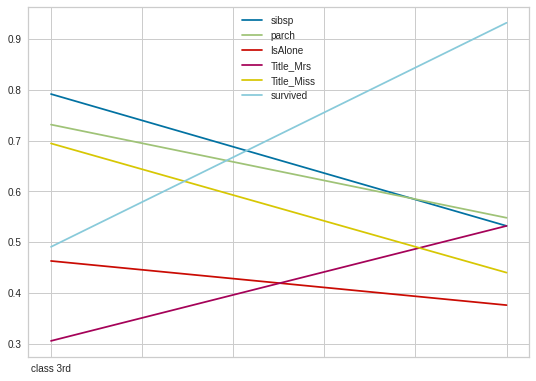

In [376]:
class_mean_df[['sibsp','parch','IsAlone','Title_Mrs','Title_Miss','survived']].plot(figsize=(8,6))

<AxesSubplot:>

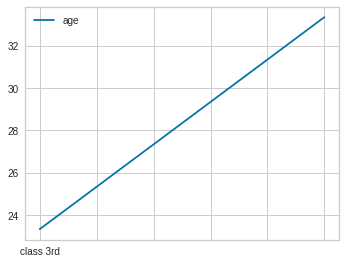

In [377]:
class_mean_df[['age']].plot(figsize=(5,4))

We can conclude from the line graph above that 3rd class female are younger and mostly unmarried. They got more family members compared to 1st & 2nd class female. After going through both dataframes, we can find that 3rd class had more girls and also the couples are younger. 

### Does family members makes a difference to 3rd class female

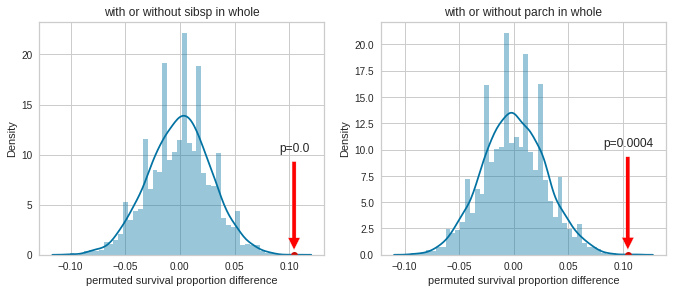

In [378]:
plt.figure(figsize=(10,4))
perm_p, obs_diff, perm_diff = permutation_test(with_sibsp[with_sibsp['sibsp']!=0], with_sibsp[with_sibsp['sibsp']==0], 'survived')
plt.subplot(1,2,1,title='with or without sibsp in whole', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,10))
perm_p, obs_diff, perm_diff = permutation_test(with_sibsp[with_sibsp['sibsp']!=0], with_sibsp[with_sibsp['sibsp']==0], 'survived')
plt.subplot(1,2,2,title='with or without parch in whole', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,10))

The figure above is similar to what we have done in previous part. The results proved that in general, travel with relatives will increase the chance of survival. Then we'll see if this is true in 3rd class female.

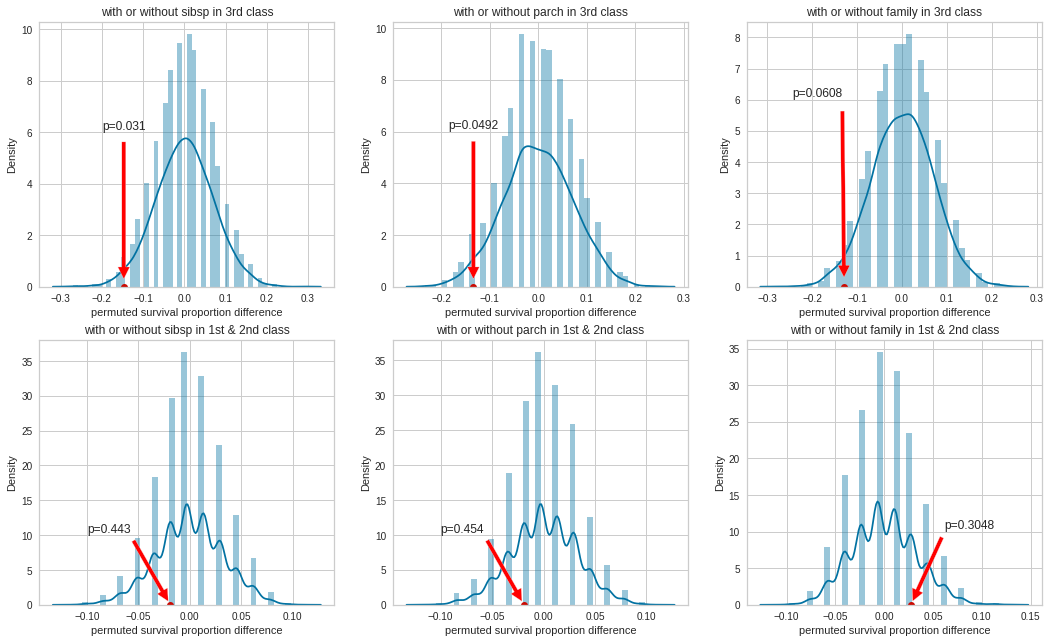

In [397]:
plt.figure(figsize=(16,10))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['sibsp']!=0], class_3[class_3['sibsp']==0], 'survived')
plt.subplot(2,3,1,title='with or without sibsp in 3rd class', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['parch']!=0], class_3[class_3['parch']==0], 'survived')
plt.subplot(2,3,2,title='with or without parch in 3rd class', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['FamilySize']!=1], class_3[class_3['FamilySize']==1], 'survived')
plt.subplot(2,3,3,title='with or without family in 3rd class', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(-0.06,6))


perm_p, obs_diff, perm_diff = permutation_test(class_12[class_12['sibsp']!=0], class_12[class_12['sibsp']==0], 'survived')
plt.subplot(2,3,4,title='with or without sibsp in 1st & 2nd class', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(-0.06,10))
perm_p, obs_diff, perm_diff = permutation_test(class_12[class_12['sibsp']!=0], class_12[class_12['sibsp']==0], 'survived')
plt.subplot(2,3,5,title='with or without parch in 1st & 2nd class', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(-0.06,10))
perm_p, obs_diff, perm_diff = permutation_test(class_12[class_12['FamilySize']!=1], class_12[class_12['FamilySize']==1], 'survived')
plt.subplot(2,3,6,title='with or without family in 1st & 2nd class', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0.06,10))


Although we should reject our null hypothesis here according to beverini correction, but results show a clear trend that 3rd class female that are travelling with relatives are more unlikely to survive. This is very different from what we saw from the whole population, this may because most male travelling alone won't survive thus shifts the data.

However, female in 1st & 2nd class didn't show the trend as 3rd class female which may indicates relatives are more important to 3rd class female. 

In [411]:
# select adult single female 
class_3_asfemale = class_3[class_3['FamilySize']==1][class_3['age'] >=18]
class_3_asfemale.shape

(87, 18)

In [412]:
class_3_parchMrs = class_3[class_3['Title_Mrs']==1][class_3['FamilySize']!=1]
class_3_parchMrs.shape

(55, 18)

survival proportion difference: 0.049320794148380365


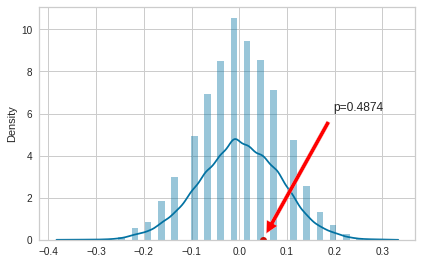

In [413]:
plt.figure(figsize=(6,4))
perm_p, obs_diff, perm_diff = permutation_test(class_3_asfemale, class_3_parchMrs, 'survived')
print("survival proportion difference:", obs_diff)
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0.2,6))


This is a little bit confusing now

In [430]:
class_3[class_3['age'] <= 18].survived.value_counts(normalize=True)

1    0.506849
0    0.493151
Name: survived, dtype: float64

In [431]:
class_3_asfemale.survived.value_counts(normalize=True)

1    0.54023
0    0.45977
Name: survived, dtype: float64

In [432]:
class_3_parchMrs.survived.value_counts(normalize=True)

0    0.509091
1    0.490909
Name: survived, dtype: float64

In [416]:
class_3[class_3['survived']==0].shape

,name,age,class,fare,sibsp,parch,survived,FamilySize,IsAlone,Fare_class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,gender_male,embarked_Queenstown,embarked_Southampton
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",39.0,3,0.189676,1.0,1.0,1,3.0,0,3,0,0,0,1,0,0,0,1
4,"Abelseth, Miss. Karen Marie",16.0,3,-1.308544,0.0,0.0,1,1.0,1,1,0,1,0,0,0,0,0,1
12,"Ahlin, Mrs. Johanna Persdotter",40.0,3,-0.378349,1.0,0.0,0,2.0,0,2,0,0,0,1,0,0,0,1
14,"Aks, Mrs. Leah",18.0,3,-0.383957,0.0,1.0,1,2.0,0,2,0,0,0,1,0,0,0,1
28,"Andersen-Jensen, Miss. Carla Christine Nielsine",19.0,3,-0.870846,1.0,0.0,1,2.0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,"Van Impe, Mrs. Rosalie Paula",30.0,3,0.295415,1.0,1.0,0,3.0,0,4,0,0,0,1,0,0,0,1
1215,"Veström, Miss. Hulda Amanda Adolfina",14.0,3,-0.870846,0.0,0.0,0,1.0,1,1,0,1,0,0,0,0,0,1
1259,"Wilkes, Mrs. Ellen",47.0,3,-2.052006,1.0,0.0,1,2.0,0,1,0,0,0,1,0,0,0,1
1279,"Yazbeck, Mrs. Selini",15.0,3,-0.012660,1.0,0.0,1,2.0,0,3,0,0,0,1,0,0,0,0


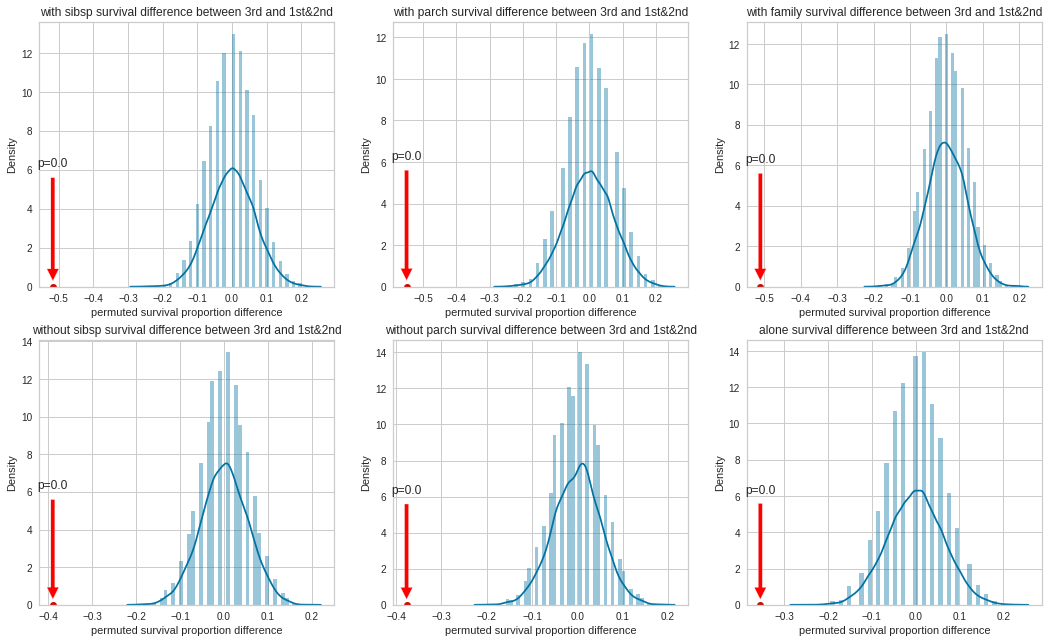

In [380]:
plt.figure(figsize=(16,10))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['sibsp']!=0], class_12[class_12['sibsp']!=0], 'survived')
plt.subplot(2,3,1,title='with sibsp survival difference between 3rd and 1st&2nd', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['parch']!=0], class_12[class_12['parch']!=0], 'survived')
plt.subplot(2,3,2,title='with parch survival difference between 3rd and 1st&2nd', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['FamilySize']!=1], class_12[class_12['FamilySize']!=1], 'survived')
plt.subplot(2,3,3,title='with family survival difference between 3rd and 1st&2nd', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))

perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['sibsp']==0], class_12[class_12['sibsp']==0], 'survived')
plt.subplot(2,3,4,title='without sibsp survival difference between 3rd and 1st&2nd', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['parch']==0], class_12[class_12['parch']==0], 'survived')
plt.subplot(2,3,5,title='without parch survival difference between 3rd and 1st&2nd', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))
perm_p, obs_diff, perm_diff = permutation_test(class_3[class_3['FamilySize']==1], class_12[class_12['FamilySize']==1], 'survived')
plt.subplot(2,3,6,title='alone survival difference between 3rd and 1st&2nd', xlabel="permuted survival proportion difference") 
perm_plot(perm_p,obs_diff, perm_diff, arrow_shift=(0,6))

In [ ]:
def survive_factors(model, data):
    # Create object that can calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(data)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], data)

In [ ]:
def single_case_survie_factors(model,index):
    sample_data_for_prediction = X_test.iloc[index].astype(float)  # to test function
    return survive_factors(model, sample_data_for_prediction)
single_case_survie_factors(rf, 169)